<a href="https://colab.research.google.com/github/ninis19/coba1/blob/main/Copy_of_Case_Study_04_Korelasi_dan_Regresi_Ganjil_2022_Kelompok_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Mengimport modul yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
url = 'https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv'
df = pd.read_csv(url,sep=',')
df

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [4]:
df.dtypes

meter_reading         float64
primary_use            object
square_feet             int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


In [8]:
df.isnull().sum()

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64

In [6]:
df.corr()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,1.000000,0.583356,0.144270,0.446672,-0.034220,0.018100,-0.017421,0.387546,-0.004600,-0.001357,-0.073006
square_feet,0.583356,1.000000,0.110153,0.537979,-0.022617,-0.045953,-0.076130,0.135071,-0.072661,-0.075351,-0.125481
year_built,0.144270,0.110153,1.000000,0.100369,0.302401,0.120571,0.268517,-0.030513,-0.021592,-0.357199,-0.202875
floor_count,0.446672,0.537979,0.100369,1.000000,-0.349697,-0.255937,-0.294305,0.368142,-0.375738,0.404375,-0.046254
air_temperature,-0.034220,-0.022617,0.302401,-0.349697,1.000000,0.096532,0.569026,-0.403071,-0.310915,-0.756898,-0.600079
cloud_coverage,0.018100,-0.045953,0.120571,-0.255937,0.096532,1.000000,0.095455,-0.185038,0.207704,0.151642,0.413007
dew_temperature,-0.017421,-0.076130,0.268517,-0.294305,0.569026,0.095455,1.000000,-0.134132,0.453920,-0.471817,-0.231857
precip_depth_1_hr,0.387546,0.135071,-0.030513,0.368142,-0.403071,-0.185038,-0.134132,1.000000,0.173143,0.238778,0.090694
sea_level_pressure,-0.004600,-0.072661,-0.021592,-0.375738,-0.310915,0.207704,0.453920,0.173143,1.000000,0.144074,0.198839
wind_direction,-0.001357,-0.075351,-0.357199,0.404375,-0.756898,0.151642,-0.471817,0.238778,0.144074,1.000000,0.842631


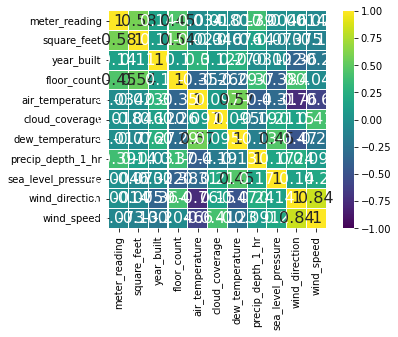

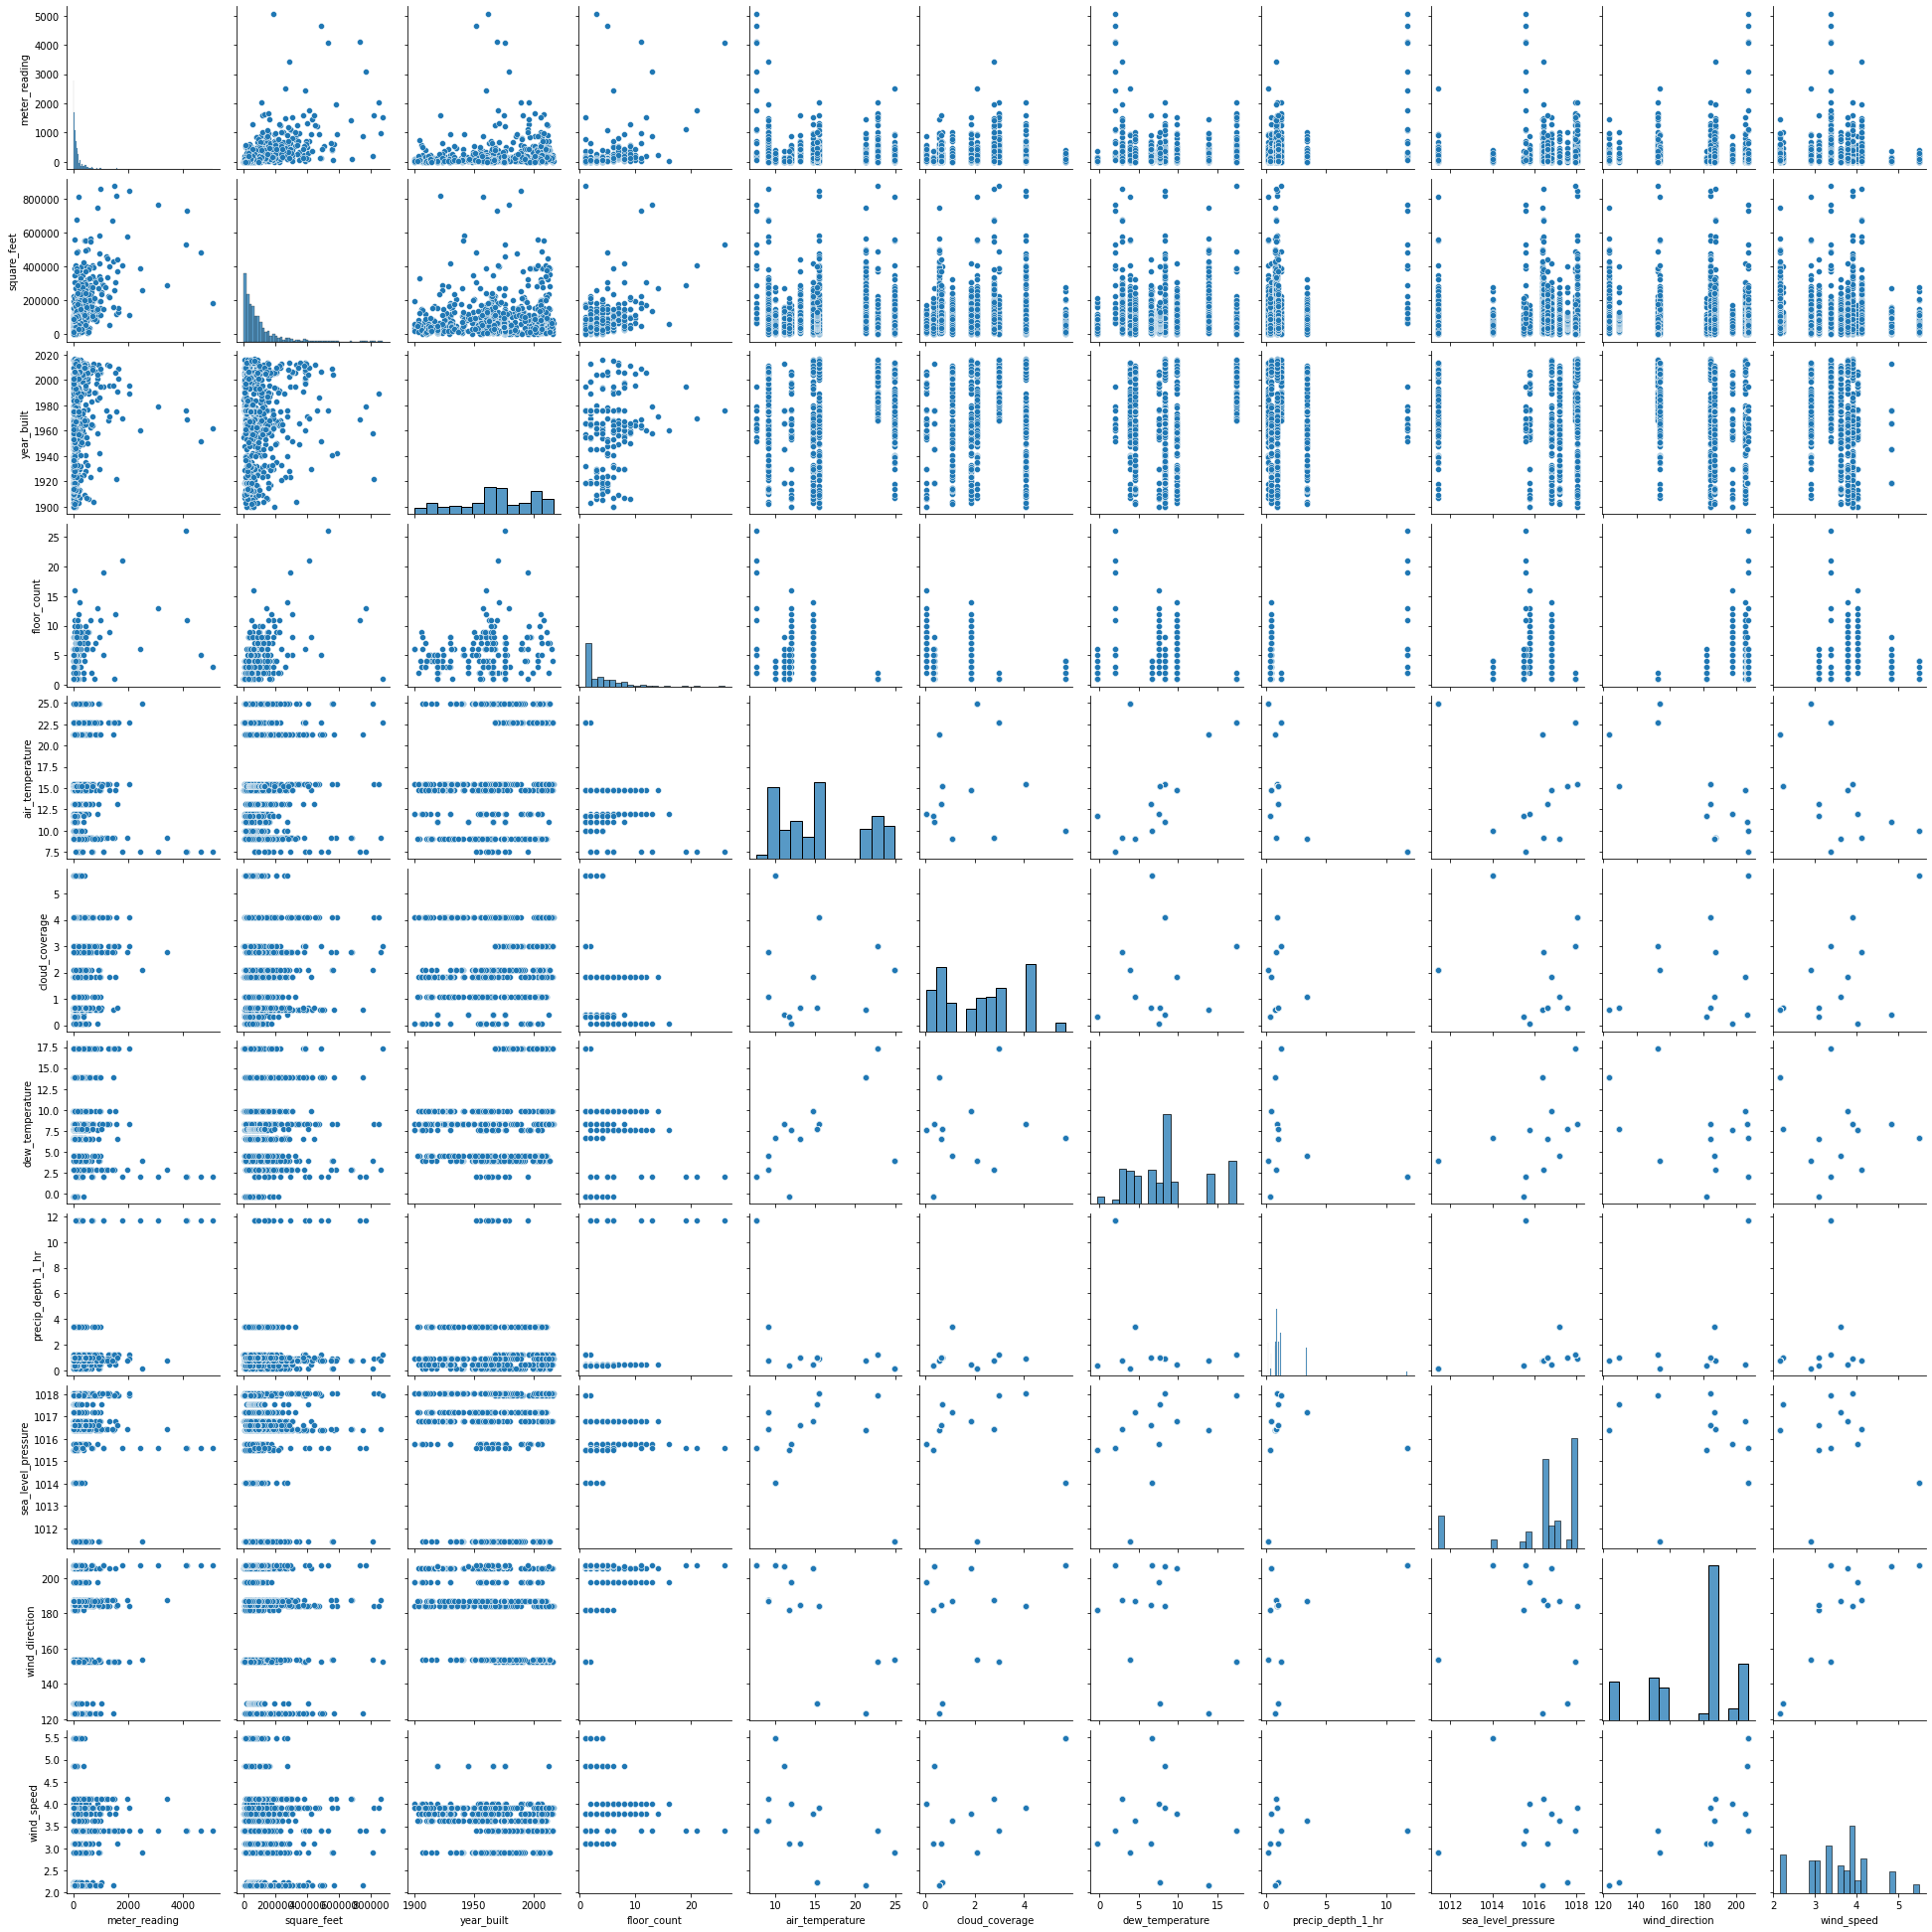

In [9]:
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True,
annot_kws={"size": 16}, square=True)
p = sns.pairplot(df)

In [11]:
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [13]:
df.describe()

,meter_reading,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
mean,185.383188,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433
max,5072.323426,875000.000000,2017.000000,26.000000,24.963702,5.671785,17.379328,11.675633,1018.052063,207.134076,5.493939


In [38]:
df['wind_speed'].max()

5.493938695551971

In [41]:
df[df['wind_speed']==5.493938695551971]

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1020,249.729636,Education,118489,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1021,7.253469,Retail,3907,NaN,1.0,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1022,15.612808,Office,14585,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1023,44.858834,Office,54207,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1024,5.479016,Education,8805,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1025,85.262464,Technology/science,9838,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1026,27.653318,Education,30171,NaN,3.0,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1027,247.715668,Office,126960,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1028,8.106048,Education,8073,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939
1029,73.474596,Office,29547,NaN,NaN,9.959092,5.671785,6.693409,NaN,1014.017353,207.134076,5.493939


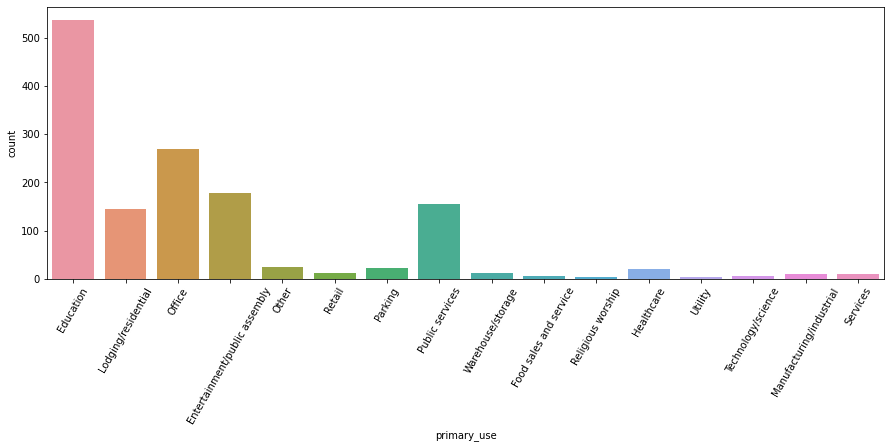

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x='primary_use',data=df)
plt.xticks(rotation=60)
plt.show()

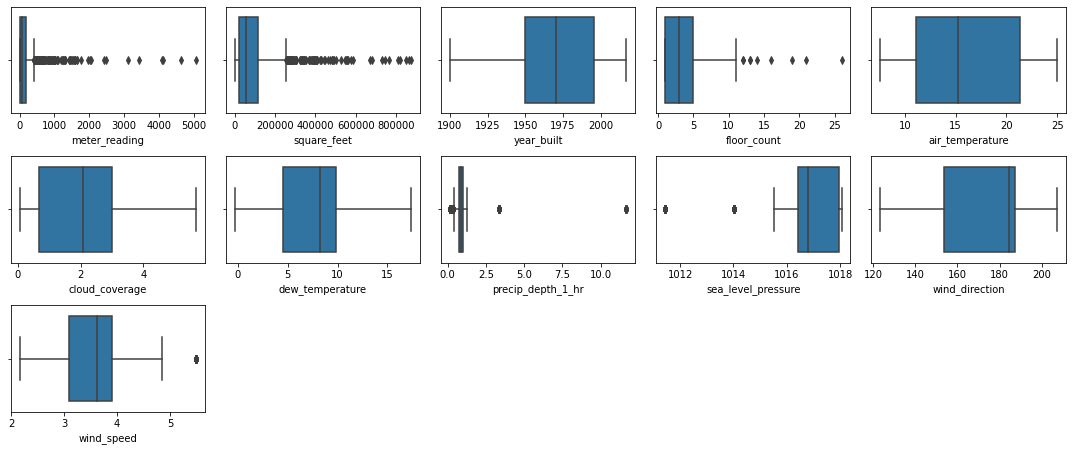

In [15]:
plt.figure(figsize=(15,8))

for i, col in enumerate(df.describe().columns):
    plt.subplot(4,5, i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    
plt.show()

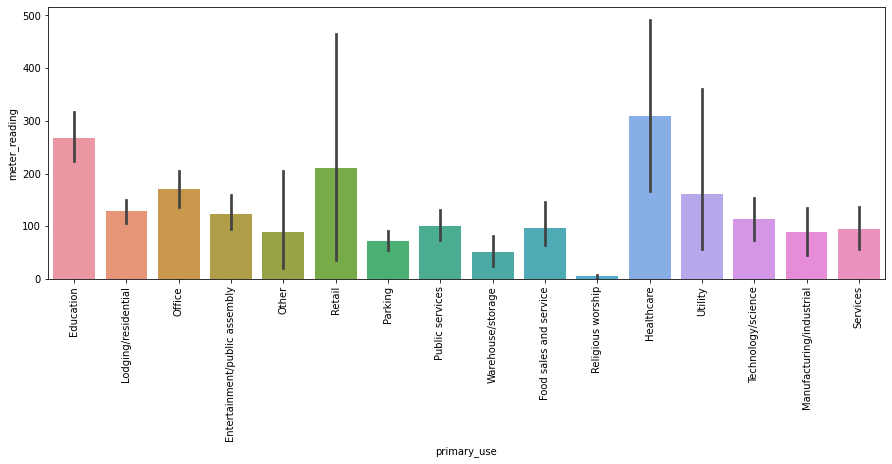

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x='primary_use', y='meter_reading',data=df)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
import matplotlib.pyplot as plt

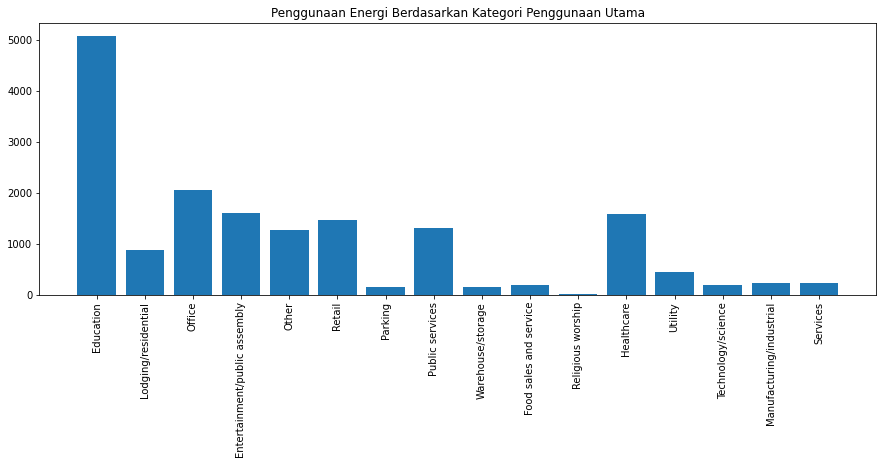

In [30]:
plt.figure(figsize=(15,5))
plt.bar(df['primary_use'],df['meter_reading'])
plt.xticks(rotation='vertical')
plt.title('Penggunaan Energi Berdasarkan Kategori Penggunaan Utama')
plt.show()

In [21]:
df.head()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [42]:
df['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

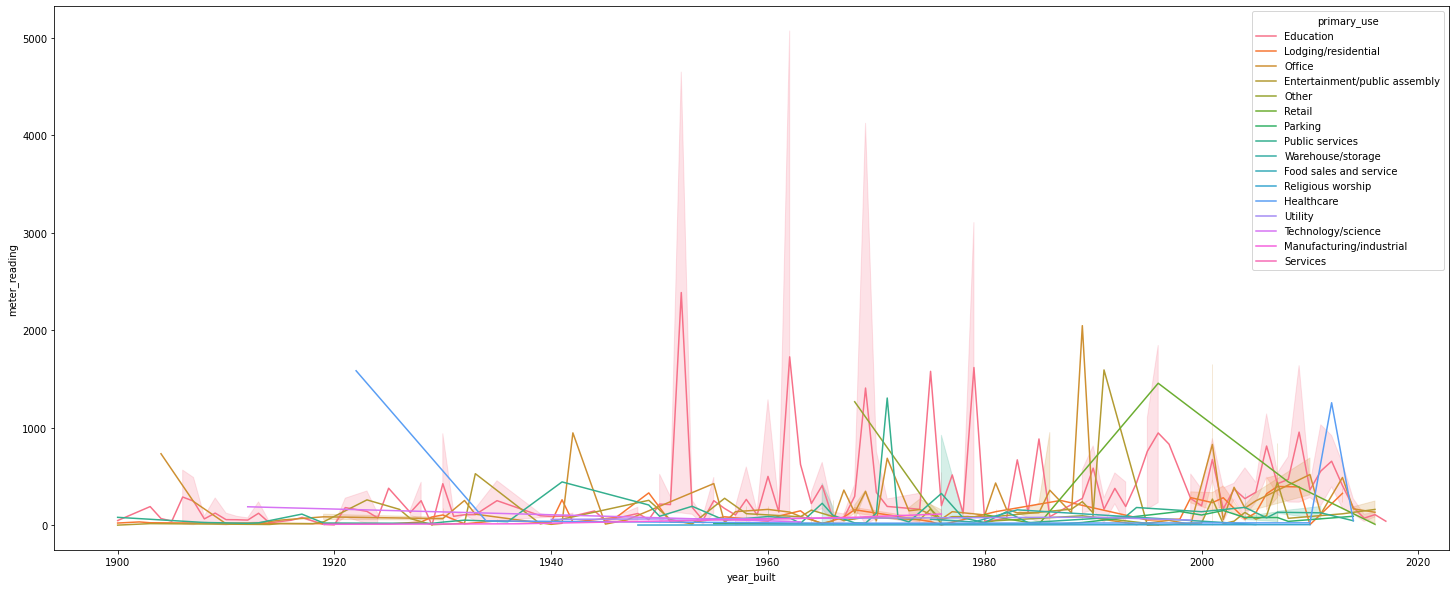

In [49]:

plt.figure(figsize=(25,10))
sns.lineplot(x='year_built', y='meter_reading', hue='primary_use', data=df)

<Figure size 1440x360 with 0 Axes>

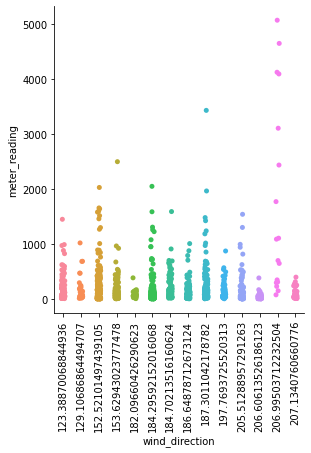

In [25]:
plt.figure(figsize=(20,5))
p=sns.catplot(x='wind_direction', y='meter_reading', data=df)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
df2.isnull().sum()

meter_reading         0
primary_use           0
square_feet           0
year_built            0
floor_count           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

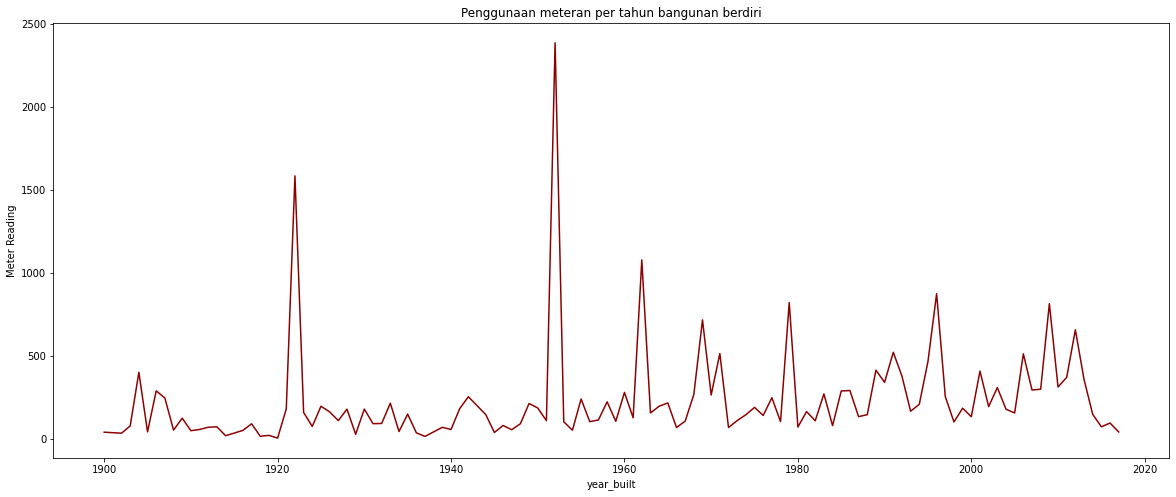

In [29]:
plt.figure(figsize=(20,8))
year_df= df.groupby('year_built').meter_reading.mean().reset_index()
sns.lineplot(x=year_df['year_built'], y=year_df['meter_reading'], color='darkred')
plt.ylabel("Meter Reading")
plt.title("Penggunaan meteran per tahun bangunan berdiri")
plt.show()

In [53]:
# method 2.
Q1,Q3 = np.percentile(df['meter_reading'] , [25,75])

IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

outliers = df[(df['meter_reading'] > ul) | (df['meter_reading'] < ll)]
outliers

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
7,569.244417,Education,121074,1989.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
8,417.394827,Education,60809,2003.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
10,1593.610509,Entertainment/public assembly,370773,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
11,475.006736,Education,49073,1968.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
...,...,...,...,...,...,...,...,...,...,...,...,...
1346,788.540784,Education,214505,1990.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1348,420.242191,Education,204029,2010.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1350,429.322064,Public services,243072,1965.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1394,433.123925,Office,53303,1981.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [55]:
df.drop(outliers)

ValueError: ignored